In [13]:
import os
import litellm
import base64
import json
import warnings
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import requests
import networkx as nx

# Load environment variables
load_dotenv()

# Suppress specific Pydantic warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")

custom_api_base = "https://litellmproxy.osu-ai.org" #Class 9 Section 1 
astro1221_key = os.getenv("ASTRO1221_API_KEY")

file = r'C:\Users\littl\Downloads\astro1221\project 1\paperabstract.txt'
with open(file, 'r') as f:
    lines = f.readlines()
print(f"Read {len(lines)} lines from file")

conversation_prompt = """

CHARACTERS:
- Dr. Daniel Beer is an inquisitive and enthusiastic astrophysicist. He is very passionate about astrophysics and will challenge others' ideas if he does not agree with them. He is good at asking the right questions, and speaks in a sophisticated, yet humble manner. 
- Dr. Davis Milk is a curious and passionate astrophysicist. He speaks in a casual manner. 
- Dr. Phil Marg is an excited astrophysicist. He likes to make jokes, and asks good questions. He is kind and speaks casually, yet intelligently. 
 

CONVERSATION FLOW:
- First, one randomly selected character out of the four gives a brief rundown of the paper, highlighting key ideas and findings in a small paragraph. 
- The other characters have not read this paper before. They will then, in random order, ask questions and comment on the paper. 
- The conversation will be very natural, like a normal conversation between humans.
- Characters will debate each other at times, making the conversation extremely tense. They will challenge each other's ideas and disagree on topics.
- Responses can range from 5 words to 60 words.


CONVERSATION TOPIC:
- Talk only about the paper abstract in paperabstract.txt, titled "The Origin of Dust in Early-Type Galaxies and Implications for Accretion onto Supermassive Black Holes"."""
conversation_history = [{"role": "user", "content": conversation_prompt}]

Read 2 lines from file


In [15]:
output = []
def prompt_llm(messages, model="openai/GPT-4.1-mini", temperature=0.5, max_tokens=2000, tools=None, verbose=True): #Class 9 Section 1 
    """
    Send a prompt or conversation to an LLM using LiteLLM and return the response.
    """
    if isinstance(messages, str):
        messages = [{"role": "user", "content": conversation_prompt}] #changed "content": messages to --> "content":conversation_prompt (12/14)
    if not (isinstance(temperature, (int, float)) and 0 <= temperature <= 2): #kept all of this the same (12/14)
        raise ValueError("temperature must be a float between 0 and 2 (inclusive).")
    if not (isinstance(max_tokens, int) and max_tokens > 0):
        raise ValueError("max_tokens must be a positive integer.")
    #creates a prompt function prompt_llm(prompt, shows GPT version, med creativity, response length, tools, verbose = true provides detailed info)

    try: 
        conversation_response = litellm.completion(
            model=model,
            messages=messages,
            tools=tools,
            api_base=custom_api_base,
            api_key=astro1221_key,
            temperature=temperature,
            max_tokens=max_tokens,
            stream=True
        )
        
        conversation_answer = conversation_response['choices'][0]['message']['content'] #choices? what does this do, ask in class (12/12), added "conversation'" in front of response and answer variables
        if verbose: 
            print(conversation_answer + "\n")
            print(f"{conversation_answer['name']}: {conversation_answer['reply']}")
            conversation_history += f"{conversation_answer['name']}: {conversation_answer['reply']}\n"
    except Exception as e:
        print("error")
        conversation_response = None
    return conversation_response
    

In [16]:
prompt_llm(conversation_prompt)

error


In [72]:
print(output)

[]


[]

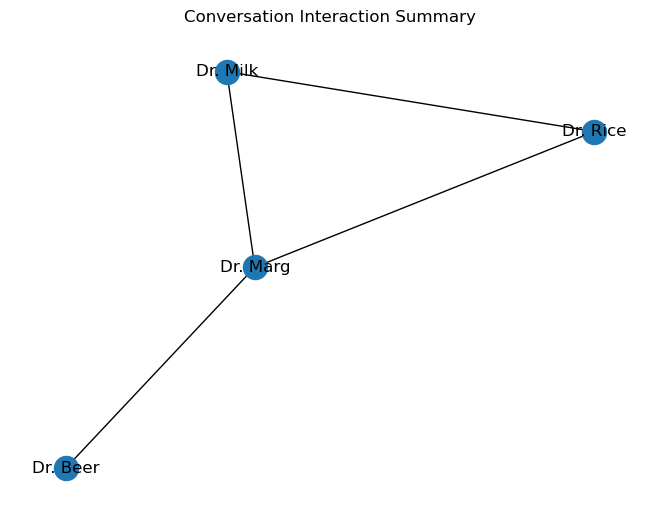

In [3]:
b = "Dr. Beer"
m = "Dr. Marg"
mi = "Dr. Milk"
r = "Dr. Rice"



nxG = nx.Graph()
nxG.add_node(b)
edges = [(b, m), (mi, m), (r, mi), (m, r)]
nxG.add_edges_from(edges)
nx.draw(nxG, with_labels=True)
plt.title("Conversation Interaction Summary")
plt.plot()